In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
PASTA_EEG = "data/train_eegs/"
PASTA_SPECTOGRAM = "data/train_spectrograms/"
SPS = 200 #samples per second

In [58]:
eeg_id = 1628180742 #3625731 

In [59]:
df = pd.read_parquet(PASTA_EEG + str(eeg_id) + '.parquet', engine='pyarrow')

In [60]:
df.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

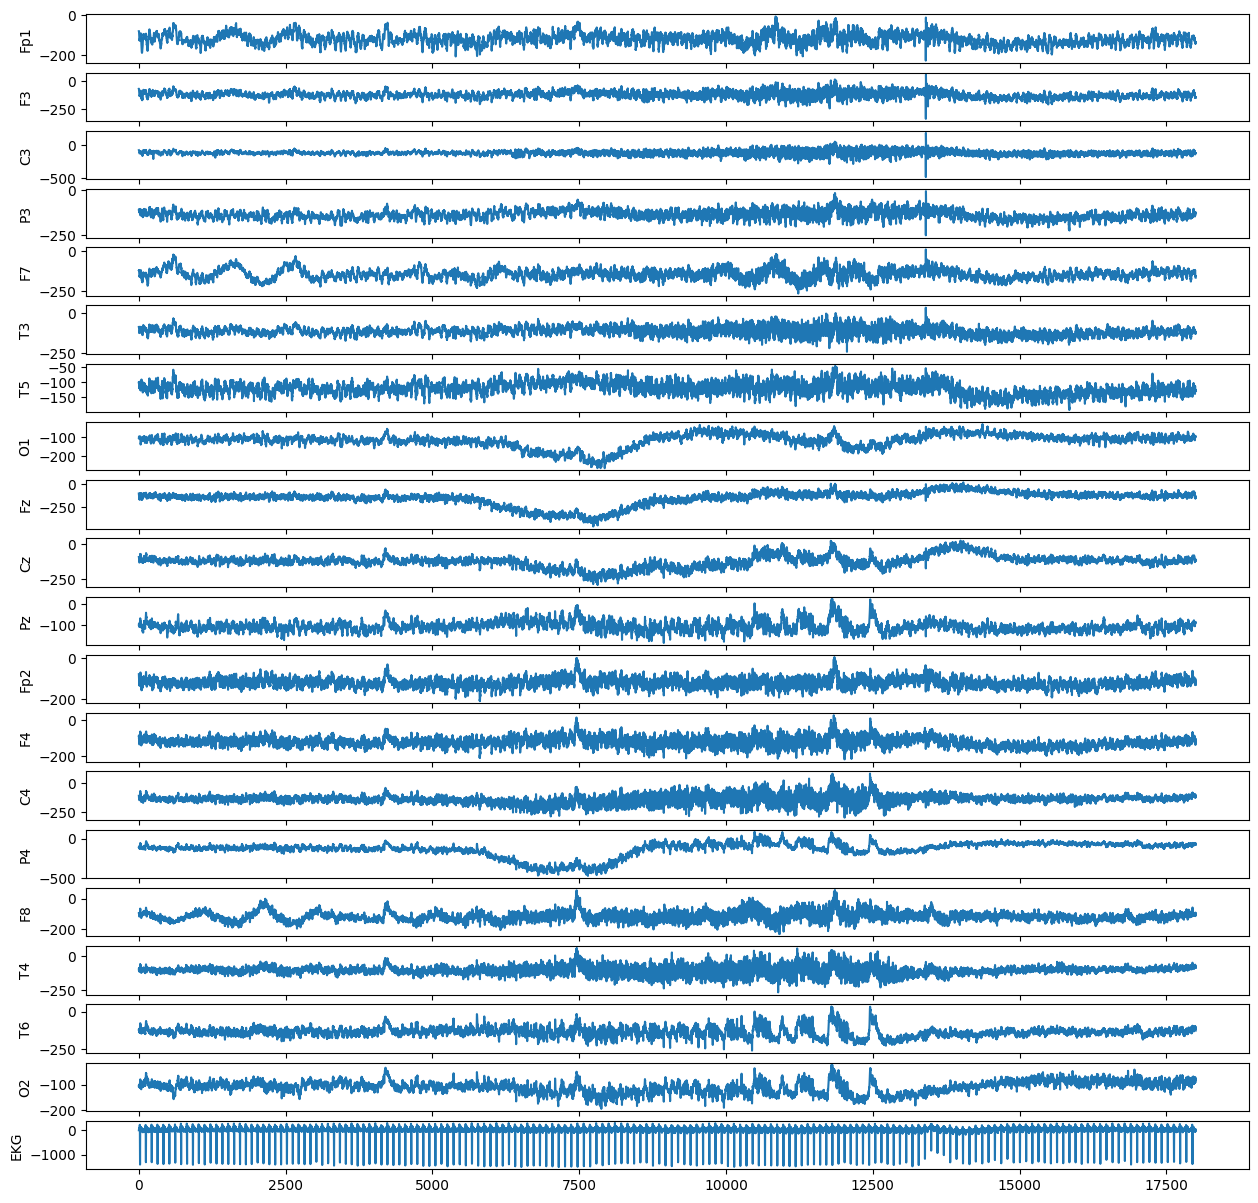

In [61]:
fig, ax = plt.subplots( len(df.columns), figsize=(15, 15))
for i, c in enumerate(df.columns):
    ax[i].plot( df[c] )
    ax[i].set_ylabel(c)

In [124]:
signal_size = df["F4"].shape[0]
frame_size = SPS
half_frame = frame_size//2
hop = frame_size//2
windows = ((signal_size-frame_size)//hop) +1
frequency_bins = (SPS//2) +1
sampling_rate = SPS

freqs = np.fft.fftfreq(frame_size, d=1.0/sampling_rate)[:half_frame]

In [125]:
results = {}

for c in df.columns:
    reals = np.empty((half_frame,))
    imaginaries = np.empty(half_frame,)
    for i in range(0, signal_size-hop, hop):
        f = np.fft.fft( df[c][i:i+frame_size]-df[c][i:i+frame_size].mean()  )[1:half_frame+1]
        reals = np.vstack([reals, abs(f.real[:half_frame])])
        imaginaries = np.vstack([imaginaries, abs(f.imag[:half_frame])])

    results[c] = (reals, imaginaries)

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


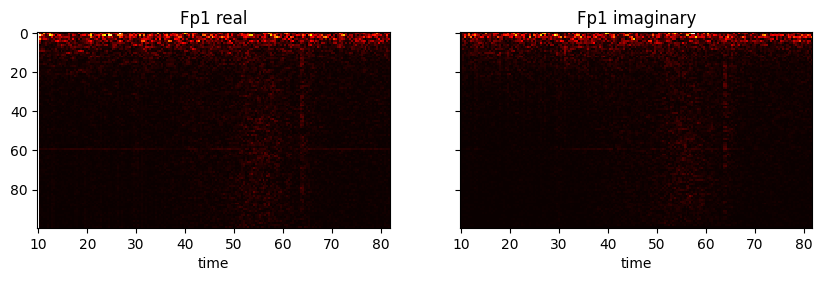

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


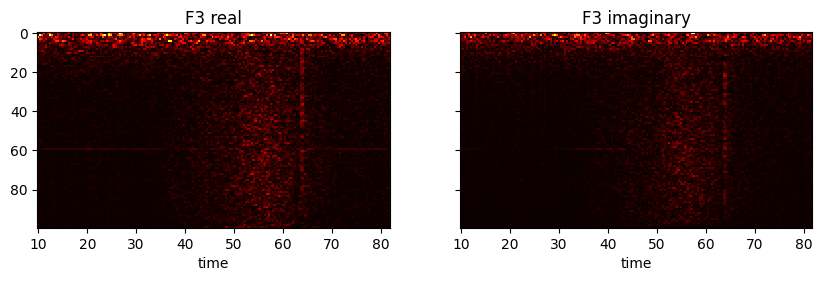

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


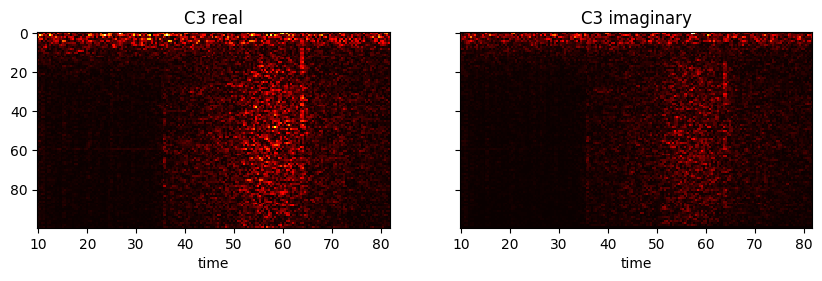

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


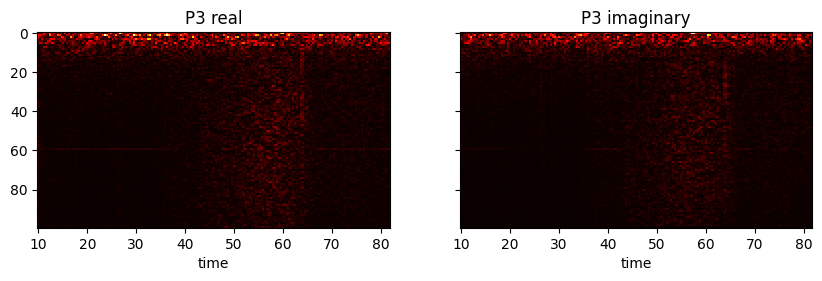

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


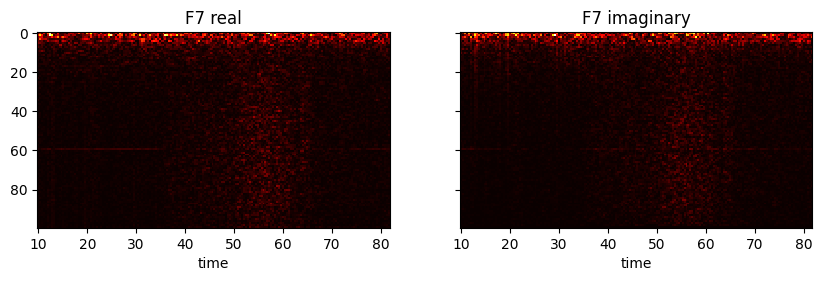

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


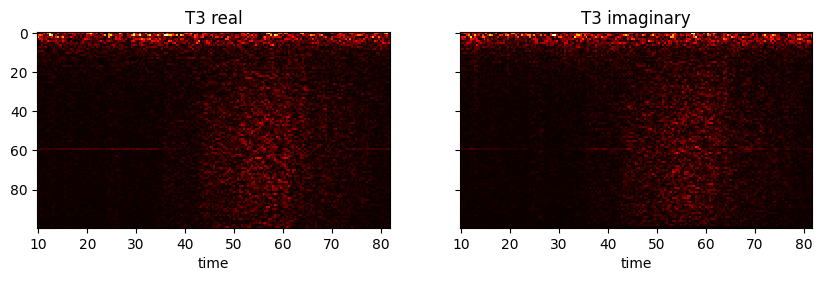

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


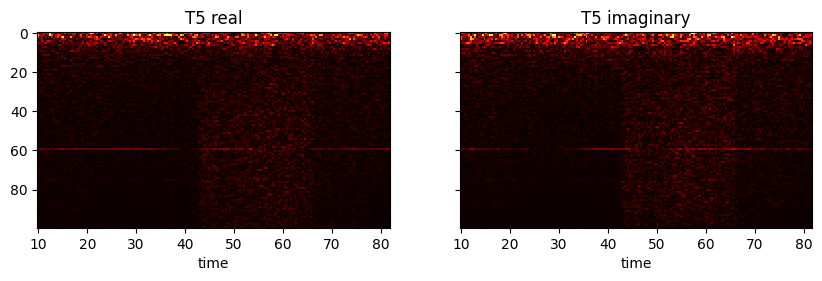

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


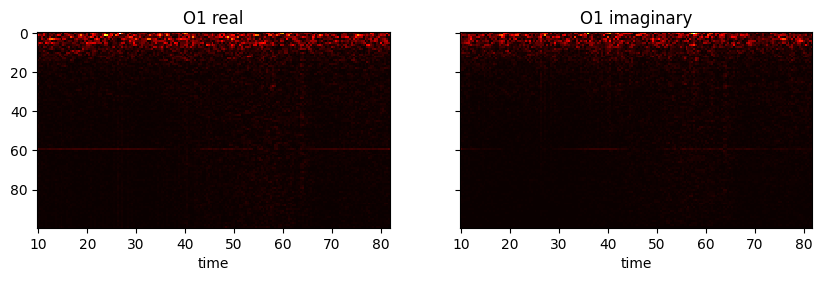

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


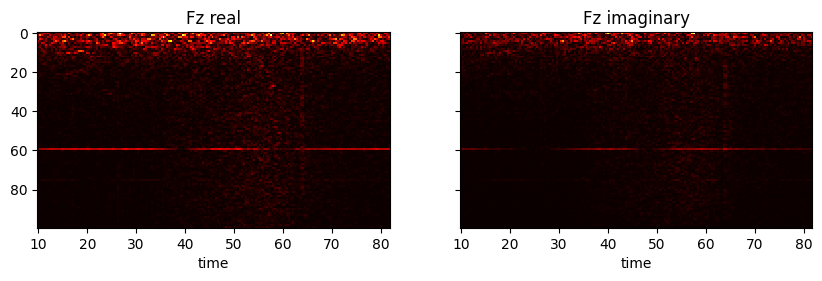

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


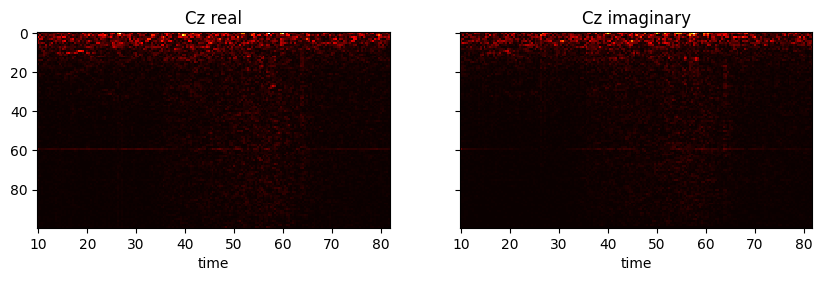

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


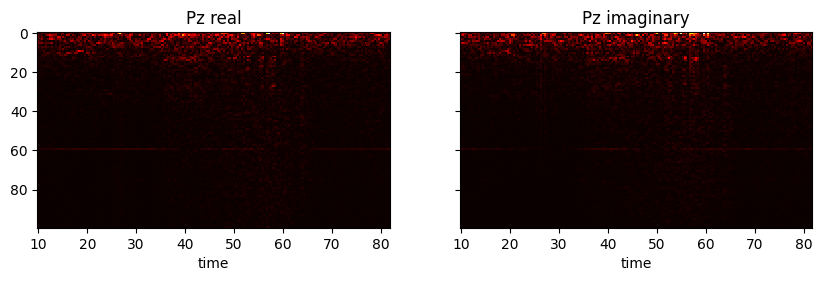

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


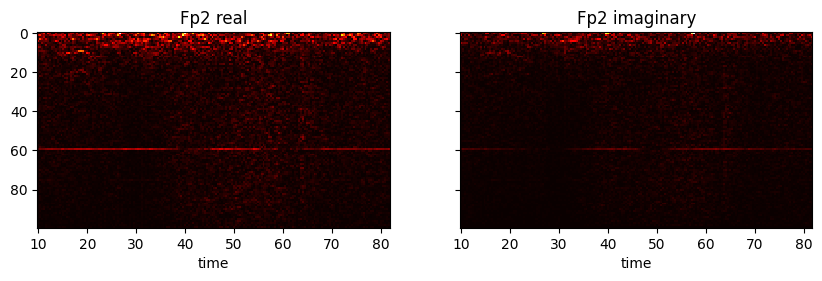

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


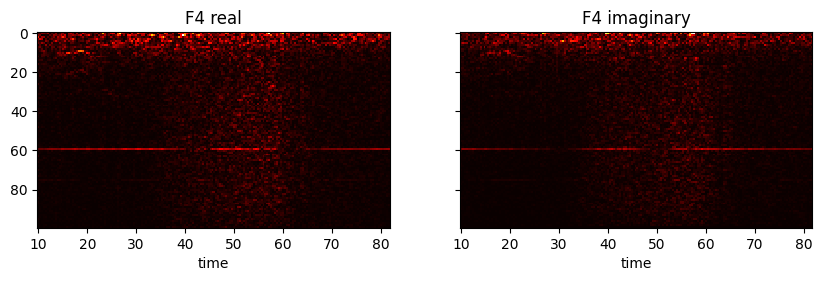

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


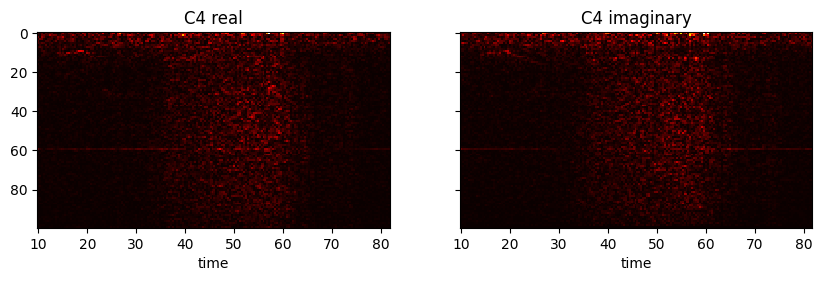

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


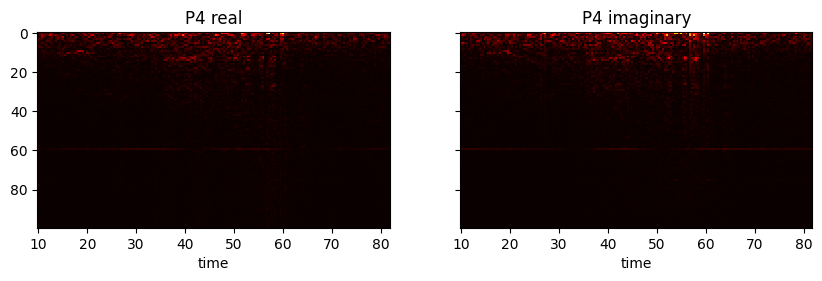

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


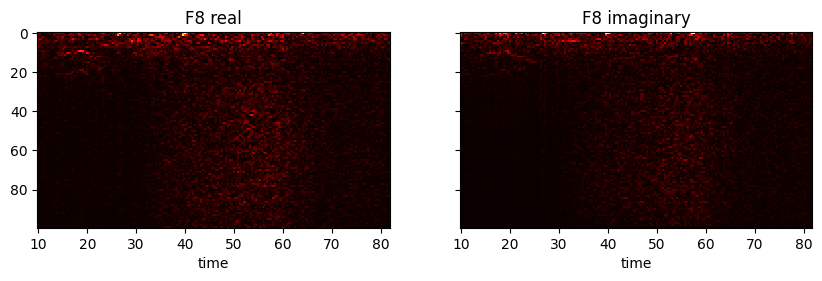

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


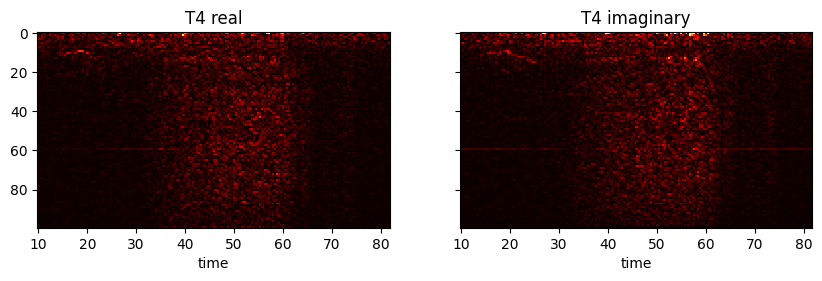

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


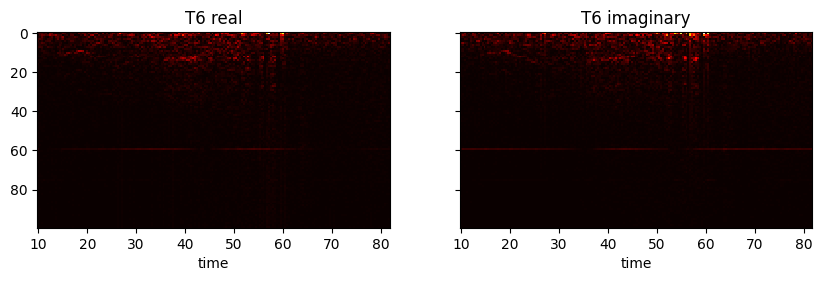

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


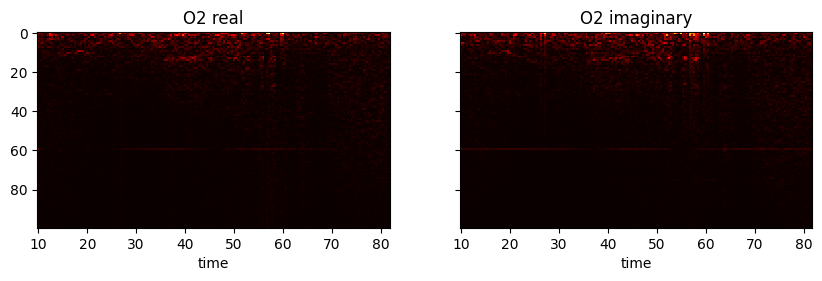

/tmp/ipykernel_11036/3445713143.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(range(0, 90, 10))
/tmp/ipykernel_11036/3445713143.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(range(0, 90, 10))


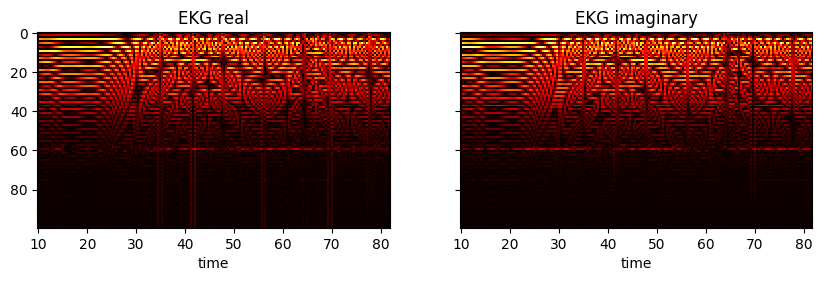

In [129]:
for c in df.columns:
    fig, ax = plt.subplots(1,2, figsize=(10,5), sharey =True )
    ax[0].imshow(results[c][0].T/half_frame , cmap='hot', interpolation='nearest')
    ax[1].imshow(results[c][1].T/half_frame , cmap='hot', interpolation='nearest')

    ax[0].set_xticklabels(range(0, 90, 10))
    ax[1].set_xticklabels(range(0, 90, 10))

    ax[0].set_xlabel('time')
    ax[1].set_xlabel('time')

    ax[0].set_title(c+" real")
    ax[1].set_title(c+" imaginary")
    plt.show()